# Introduction

A recently published method [1] for audio style transfer has shown how to extend the process of image style transfer to audio. This method synthesizes audio "content" and "style" independently using the magnitudes of a short time Fourier transform, shallow convolutional networks with randomly initialized filters, and iterative phase reconstruction with Griffin-Lim. In this work [2], we explore whether it is possible to directly optimize a time domain audio signal, removing the process of phase reconstruction and opening up possibilities for real-time applications and higher quality syntheses. We explore a variety of style transfer processes on neural networks that operate directly on time domain audio signals and demonstrate one such network capable of audio stylization.


> [1]. D. Ulyanov and V. Lebedev, “Audio texture synthesis and style transfer,” 2016

> [2]. P. K. Mital. _Time Domain Neural Audio Style Transfer_. Presented at the Workshop on Machine Learning for Creativity and Design at the Neural Information Processing Systems Conference 2017 (NIPS2017), December 3 – 9, 2017.  [arxiv](https://arxiv.org/abs/1711.11160) [workshop](https://nips2017creativity.github.io)


# Code

The github for the work shows how to perform audio style transfer using Ulyanov's original work, as well as this work's extension which uses the raw waveform without any phase retrieval.  We'll first install some libraries for audio playback/loading, then clone the repo and then `pip install` it to use it like so:

In [0]:
!apt-get install -y libav-tools libasound2-dev libsndfile1-dev libjack-dev
!git clone https://github.com/pkmital/time-domain-neural-audio-style-transfer.git audio_style_transfer
!cd audio_style_transfer/ && pip install .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus ffmpeg i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data
  libass9 libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libdrm-amdgpu1 libdrm-common
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl1-mesa libelf1
  libfftw3-double3 libflac-dev libflac8 libflite1 libfribidi0 libgbm1
  libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa libgme0 libgraphite2-3 libgsm1
  libharfbuzz0b libiec61883-0 libjack0 libllvm5.0 libmirclient9 libmircommon7
  libmircore1 libmirprotobuf3 libmp3lame0 libmpg123-0 libnuma1 libogg-dev
  libogg0 libopenal-data libopena

Get:41 http://archive.ubuntu.com/ubuntu artful/main amd64 libvorbis0a amd64 1.3.5-4 [85.0 kB]
Get:42 http://archive.ubuntu.com/ubuntu artful/main amd64 libvorbisenc2 amd64 1.3.5-4 [70.8 kB]
Get:43 http://archive.ubuntu.com/ubuntu artful/main amd64 libvpx4 amd64 1.6.1-3 [763 kB]
Get:44 http://archive.ubuntu.com/ubuntu artful/main amd64 libwavpack1 amd64 5.1.0-2 [76.6 kB]
Get:45 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebp6 amd64 0.6.0-3 [181 kB]
Get:46 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebpmux3 amd64 0.6.0-3 [20.0 kB]
Get:47 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx264-148 amd64 2:0.148.2795+gitaaa9aa8-1 [604 kB]
Get:48 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx265-130 amd64 2.5-2 [1,044 kB]
Get:49 http://archive.ubuntu.com/ubuntu artful/universe amd64 libxvidcore4 amd64 2:1.3.4-1 [206 kB]
Get:50 http://archive.ubuntu.com/ubuntu artful/universe amd64 libzvbi-common all 0.2.35-13 [32.1 kB]
Get:51 http://archive.ubuntu.c

Get:105 http://archive.ubuntu.com/ubuntu artful/universe amd64 libsndio6.1 amd64 1.1.0-3 [23.4 kB]
Get:106 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopenal1 amd64 1:1.17.2-4 [207 kB]
Get:107 http://archive.ubuntu.com/ubuntu artful/main amd64 libasyncns0 amd64 0.8-6 [12.1 kB]
Get:108 http://archive.ubuntu.com/ubuntu artful/main amd64 libflac8 amd64 1.3.2-1 [213 kB]
Get:109 http://archive.ubuntu.com/ubuntu artful/main amd64 libsndfile1 amd64 1.0.28-4 [169 kB]
Get:110 http://archive.ubuntu.com/ubuntu artful/main amd64 libwrap0 amd64 7.6.q-26 [46.1 kB]
Get:111 http://archive.ubuntu.com/ubuntu artful/main amd64 libpulse0 amd64 1:10.0-2ubuntu3 [265 kB]
Get:112 http://archive.ubuntu.com/ubuntu artful/main amd64 libwayland-client0 amd64 1.14.0-1 [22.4 kB]
Get:113 http://archive.ubuntu.com/ubuntu artful/main amd64 libwayland-cursor0 amd64 1.14.0-1 [9,898 B]
Get:114 http://archive.ubuntu.com/ubuntu artful/main amd64 libwayland-server0 amd64 1.14.0-1 [28.5 kB]
Get:115 http://archi

Get:145 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 mesa-va-drivers amd64 17.2.4-0ubuntu1~17.10.2 [1,532 kB]
Get:146 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 mesa-vdpau-drivers amd64 17.2.4-0ubuntu1~17.10.2 [1,657 kB]
Get:147 http://archive.ubuntu.com/ubuntu artful/main amd64 tcpd amd64 7.6.q-26 [23.5 kB]
Get:148 http://archive.ubuntu.com/ubuntu artful/universe amd64 i965-va-driver amd64 1.8.3-1ubuntu1 [633 kB]
Get:149 http://archive.ubuntu.com/ubuntu artful/universe amd64 va-driver-all amd64 1.8.3-2 [4,294 B]
Get:150 http://archive.ubuntu.com/ubuntu artful/main amd64 vdpau-driver-all amd64 1.1.1-3ubuntu1 [4,674 B]
Get:151 http://archive.ubuntu.com/ubuntu artful/universe amd64 libav-tools all 7:3.3.4-2 [16.1 kB]
Get:152 http://archive.ubuntu.com/ubuntu artful/main amd64 libtxc-dxtn-s2tc amd64 1.0+git20151227-2 [48.4 kB]
Fetched 61.4 MB in 8s (7,195 kB/s)
Extracting templates from packages: 100%
Selecting previously unselected package libxext6:amd64.

Selecting previously unselected package libopus0:amd64.
Preparing to unpack .../028-libopus0_1.1.2-1ubuntu1_amd64.deb ...
Unpacking libopus0:amd64 (1.1.2-1ubuntu1) ...
Selecting previously unselected package libshine3:amd64.
Preparing to unpack .../029-libshine3_3.1.1-1_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-1) ...
Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../030-libsnappy1v5_1.1.6-4_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.6-4) ...
Selecting previously unselected package libspeex1:amd64.
Preparing to unpack .../031-libspeex1_1.2~rc1.2-1ubuntu1_amd64.deb ...
Unpacking libspeex1:amd64 (1.2~rc1.2-1ubuntu1) ...
Selecting previously unselected package libsoxr0:amd64.
Preparing to unpack .../032-libsoxr0_0.1.2-2_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-2) ...
Selecting previously unselected package libswresample2:amd64.
Preparing to unpack .../033-libswresample2_7%3a3.3.4-2_amd64.deb ...
Unpacking libswresample2:amd64 (7:3.3.4-2) ..

Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../061-libgme0_0.6.1-1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.1-1) ...
Selecting previously unselected package libmpg123-0:amd64.
Preparing to unpack .../062-libmpg123-0_1.25.6-1_amd64.deb ...
Unpacking libmpg123-0:amd64 (1.25.6-1) ...
Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../063-libvorbisfile3_1.3.5-4_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4) ...
Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../064-libopenmpt0_0.2.8760~beta27-1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.2.8760~beta27-1) ...
Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../065-libssh-gcrypt-4_0.7.5-1_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.7.5-1) ...
Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../066-libavformat57_7%3a3.3.4-2_amd64.deb ...
Unpacking libavformat57:a

Selecting previously unselected package libdrm-nouveau2:amd64.
Preparing to unpack .../095-libdrm-nouveau2_2.4.83-1_amd64.deb ...
Unpacking libdrm-nouveau2:amd64 (2.4.83-1) ...
Selecting previously unselected package libdrm-radeon1:amd64.
Preparing to unpack .../096-libdrm-radeon1_2.4.83-1_amd64.deb ...
Unpacking libdrm-radeon1:amd64 (2.4.83-1) ...
Selecting previously unselected package libllvm5.0:amd64.
Preparing to unpack .../097-libllvm5.0_1%3a5.0-3_amd64.deb ...
Unpacking libllvm5.0:amd64 (1:5.0-3) ...
Selecting previously unselected package libsensors4:amd64.
Preparing to unpack .../098-libsensors4_1%3a3.4.0-4_amd64.deb ...
Unpacking libsensors4:amd64 (1:3.4.0-4) ...
Selecting previously unselected package libgl1-mesa-dri:amd64.
Preparing to unpack .../099-libgl1-mesa-dri_17.2.4-0ubuntu1~17.10.2_amd64.deb ...
Unpacking libgl1-mesa-dri:amd64 (17.2.4-0ubuntu1~17.10.2) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../100-libgl1-mesa-glx_17.2

Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../128-libxi6_2%3a1.7.9-1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.9-1) ...
Selecting previously unselected package libxrandr2:amd64.
Preparing to unpack .../129-libxrandr2_2%3a1.5.1-1_amd64.deb ...
Unpacking libxrandr2:amd64 (2:1.5.1-1) ...
Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../130-libsdl2-2.0-0_2.0.6+dfsg1-3ubuntu1_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.6+dfsg1-3ubuntu1) ...
Selecting previously unselected package libxcb-shape0:amd64.
Preparing to unpack .../131-libxcb-shape0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shape0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxv1:amd64.
Preparing to unpack .../132-libxv1_2%3a1.0.11-1_amd64.deb ...
Unpacking libxv1:amd64 (2:1.0.11-1) ...
Selecting previously unselected package libavdevice57:amd64.
Preparing to unpack .../133-libavdevice57_7%3a3.3.4-2_amd64.deb ...
Unpacking libavdevi

Setting up libogg0:amd64 (1.3.2-1) ...
Setting up libx11-xcb1:amd64 (2:1.6.4-3) ...
Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Setting up libmp3lame0:amd64 (3.99.5+repack1-9build1) ...
Setting up libxcursor1:amd64 (1:1.1.14-3ubuntu0.1) ...
Setting up libusb-1.0-0:amd64 (2:1.0.21-2) ...
Setting up libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...
Processing triggers for libc-bin (2.26-0ubuntu2) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17) ...
Setting up libsnappy1v5:amd64 (1.1.6-4) ...
Setting up libavc1394-0:amd64 (0.5.4-4) ...
Setting up libx265-130:amd64 (2.5-2) ...
Setting up libzvbi-common (0.2.35-13) ...
Setting up libfribidi0:amd64 (0.19.7-1) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxcb-shape0:amd64 (1.12-1ubuntu1) ...
Setting up libpciaccess0:amd64 (0.13.4-1ubuntu1) ...
Setting up libxv1:amd64 (2:1.0.11-1) ...
Setting up libsensors4:amd64 (1:3.4.0-4) ...
Setting up libxkbcommon0:amd64 (0.7.1-2) ...
Setting up libcdio-paranoia1:amd64 (0.8

remote: Total 161 (delta 2), reused 13 (delta 1), pack-reused 146
Receiving objects: 100% (161/161), 40.82 MiB | 39.03 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Processing /content/audio_style_transfer
    100% |████████████████████████████████| 1.5MB 847kB/s 
    100% |████████████████████████████████| 1.0MB 1.2MB/s 
    100% |████████████████████████████████| 184kB 5.6MB/s 
    100% |████████████████████████████████| 327kB 3.6MB/s 
    100% |████████████████████████████████| 225kB 4.2MB/s 
    100% |████████████████████████████████| 71kB 9.5MB/s 
    100% |████████████████████████████████| 5.6MB 250kB/s 
    100% |████████████████████████████████| 15.4MB 95kB/s 


    100% |████████████████████████████████| 81kB 10.5MB/s 
    100% |████████████████████████████████| 1.9MB 714kB/s 
    100% |████████████████████████████████| 14.8MB 96kB/s 
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /content/.cache/pip/wheels/7a/bf/9f/fc279e1814da2144161848a7419cdcf923d0c03f481abe7904
  Running setup.py bdist_wheel for audioread ... - done
  Stored in directory: /content/.cache/pip/wheels/47/cc/d8/e1476000d1720a72117ef5c0b1a51388b8567ebfface47ede7


  Running setup.py bdist_wheel for resampy ... - done
  Stored in directory: /content/.cache/pip/wheels/c6/8e/c0/4c402972789ddf6d2d701468417de19d0cad28bd698a867e2d
  Running setup.py bdist_wheel for python-rtmidi ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/ce/1d/4a/9f6d3d59b4b138c38577dcd03656fb29d8c31456d2c6982c3b
  Running setup.py bdist_wheel for pretty-midi ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/8b/ba/2e/151fa65f40abe65c4d7804f70223b07d70fcf7f4ef3fba56f2
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/a7/2c/4a/96740179eabf7ddba1f7ae36ba96540e8a7e557936eaab4829
  Running setup.py bdist_wheel for intervaltree ... - \ done
  Stored in directory: /content/.cache/pip/wheels/89/40/01/fa05b5a8202a472fb143815e7589fdf74369e710ca675cad11
  Running setup.py bdist_wheel for mir-eval ... - \ done
  Stored in directory: /content/

We should now have access to the code:

In [0]:
import numpy as np
import librosa
from librosa.display import specshow
from IPython.display import Audio
from audio_style_transfer.models import timedomain

In [0]:
def plot_spec(audio):
  D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
  specshow(D, y_axis='log')

In [0]:
help(timedomain)

Help on module audio_style_transfer.models.timedomain in audio_style_transfer.models:

NAME
    audio_style_transfer.models.timedomain

DESCRIPTION
    NIPS2017 "Time Domain Neural Audio Style Transfer" code repository
    Parag K. Mital

FUNCTIONS
    batch(content_path, style_path, output_path, model)
    
    chop(signal, hop_size=256, frame_size=512)
    
    compute_features(content, style, input_features, norm=False, stride=1, n_layers=1, n_filters=4096, n_fft=1024, k_h=1, k_w=11)
    
    compute_inputs(x, freqs, n_fft, n_frames, input_features, norm=False)
    
    compute_stylization(kernels, n_samples, n_frames, content_features, style_gram, freqs, input_features, norm=False, stride=1, n_layers=1, n_fft=1024, alpha=0.0001, learning_rate=0.001, iterations=100, optimizer='bfgs')
    
    dft_np(signal, hop_size=256, fft_size=512)
    
    idft_np(re, im, hop_size=256, fft_size=512)
    
    instance_norm(x, epsilon=1e-05)
        Instance Normalization.
        
        See Uly

Let's grab some audio to play with and then try stylizing it.  First the style:

/usr/local/lib/python3.6/dist-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


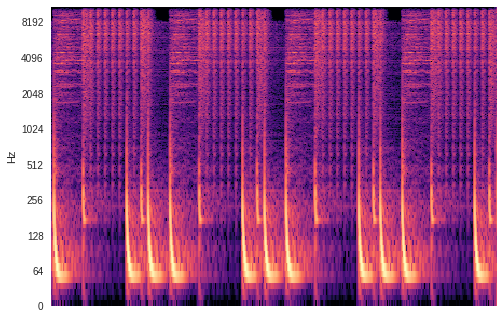

In [0]:
style = 'audio_style_transfer/sounds/corpus/johntejada-1.wav'
audio, sr = librosa.core.load(style, sr=22050)
plot_spec(audio)

In [0]:
Audio(audio, rate=sr)

Now the content:

/usr/local/lib/python3.6/dist-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


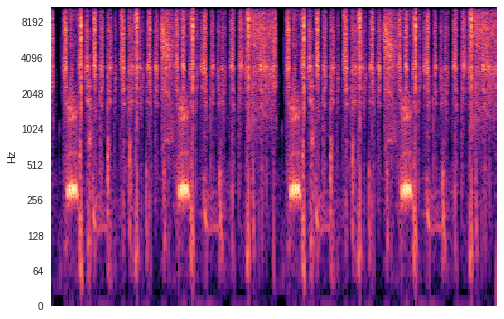

In [0]:
content = 'audio_style_transfer/sounds/target/beat-box-1.wav'
audio, sr = librosa.core.load(content, sr=22050)
plot_spec(audio)

In [0]:
Audio(audio, rate=sr)

And now let's try synthesizing.  In general, most parameters with higher settings produce more desirable results (except for `hop_length` and `stride` which are often better with smaller values).

In [0]:
timedomain.run(content,
               style,
               'synthesis.wav',
               n_fft=4096,
               n_filters=4096,
               hop_length=512,
               alpha=0.05,
               k_w=4)

Started optimization.
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 888328.250000
  Number of iterations: 301
  Number of functions evaluations: 313


/usr/local/lib/python3.6/dist-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


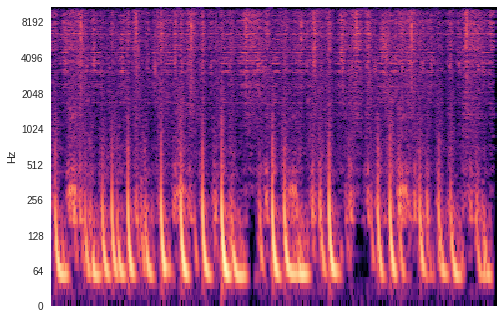

In [0]:
audio, sr = librosa.core.load('synthesis.wav', sr=22050)
plot_spec(audio)

In [0]:
Audio(audio, rate=sr)